In [5]:
from torch import nn , save , load
import torchvision
import torch
import numpy as np
from tqdm.notebook import tqdm
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
import os
import cv2
import numpy as np

try:
    os.remove("dataset/README")
except:
    print("README not found")

In [7]:
def show_image(images,label):
    image = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
    image = cv2.convertScaleAbs(image)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0) #blurry the image
    plt.imshow(blurred_image)
    plt.title(label)
    plt.axis('off')  # Turn off axis labels
    plt.show()

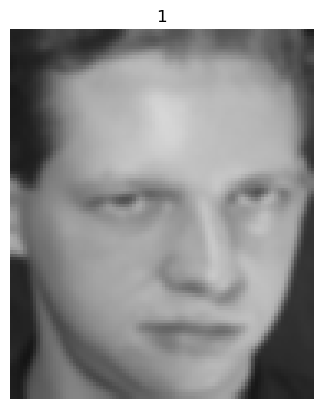

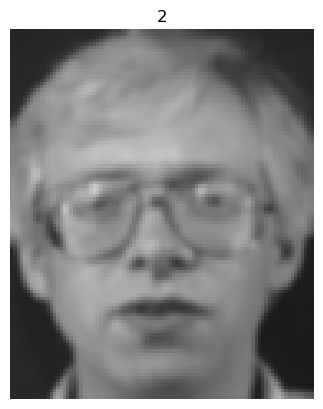

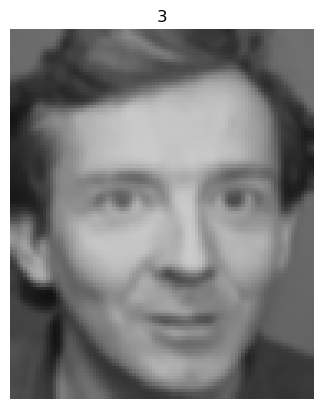

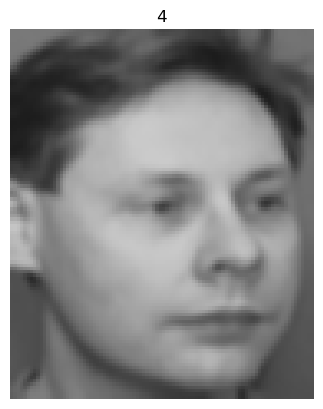

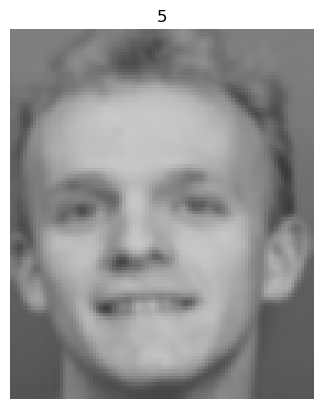

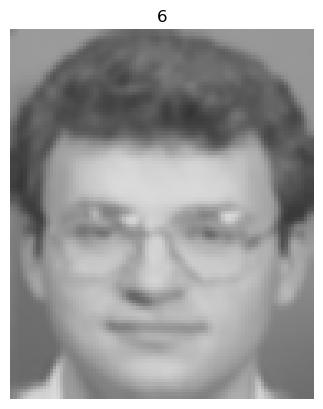

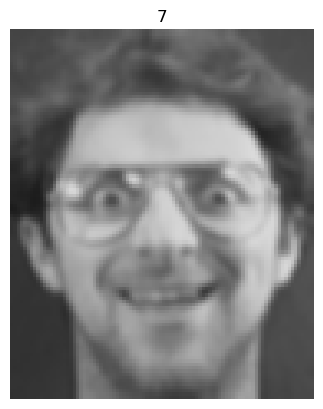

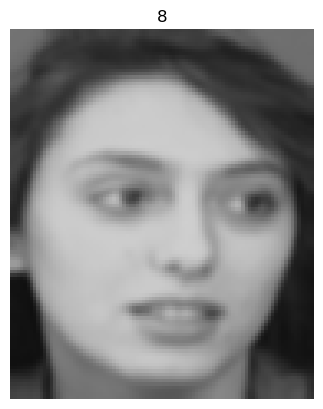

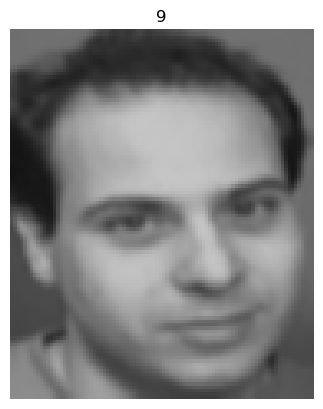

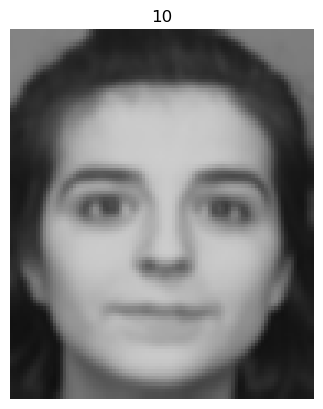

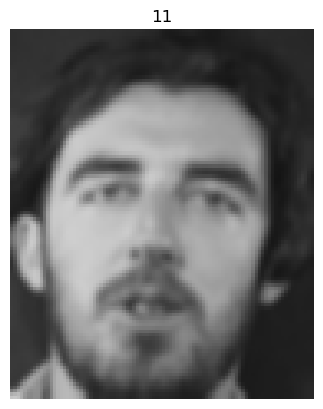

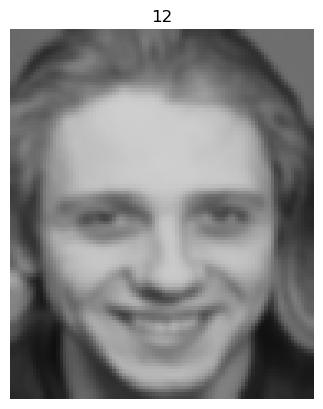

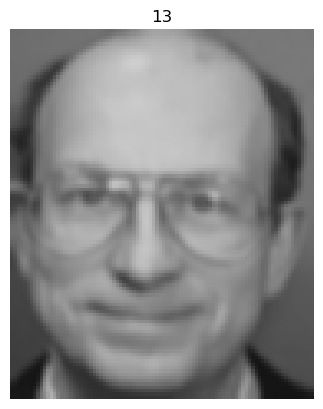

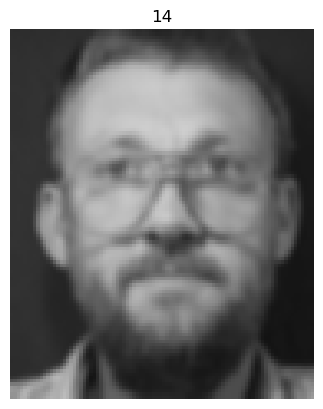

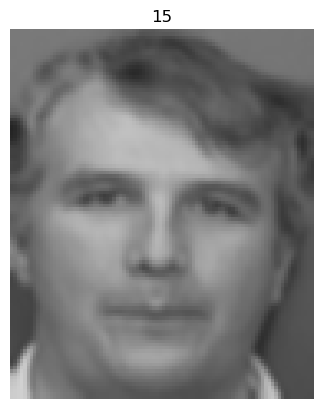

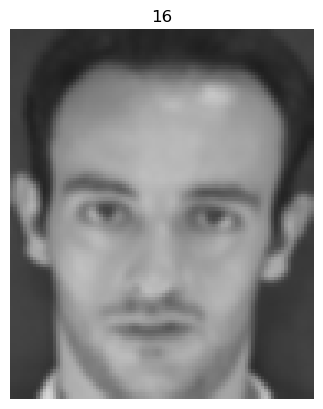

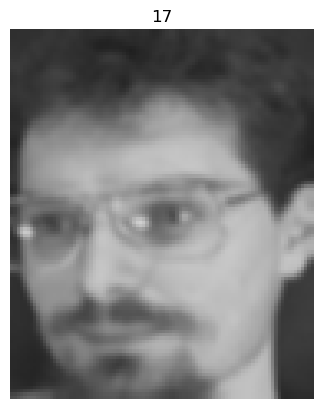

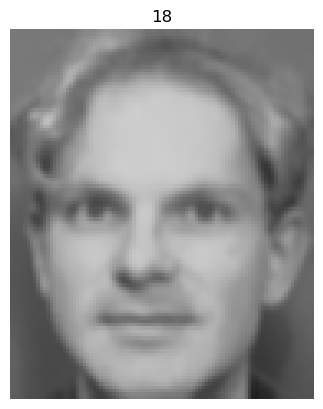

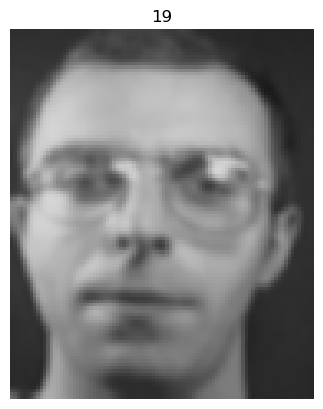

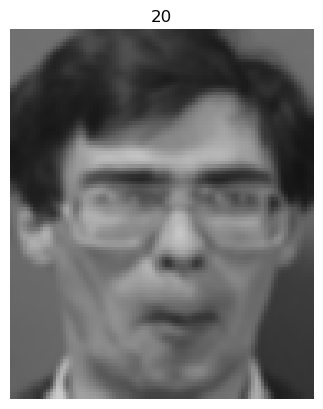

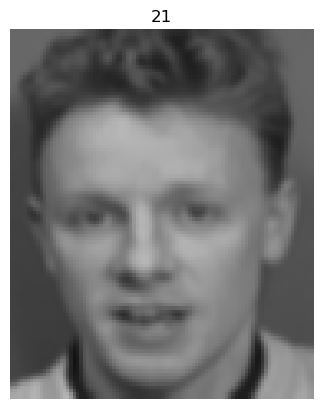

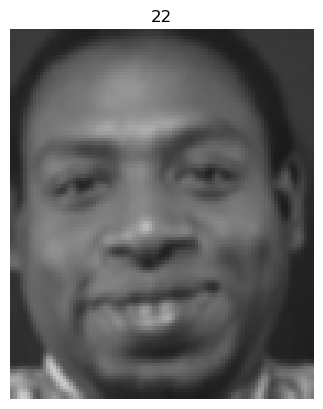

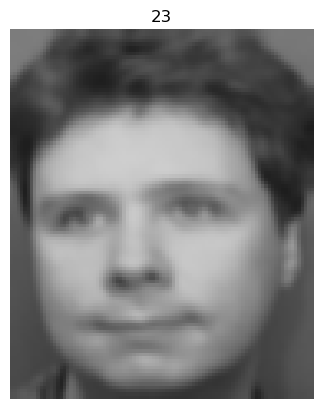

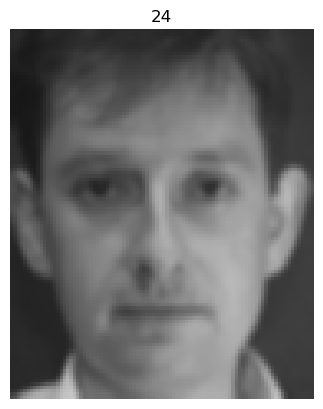

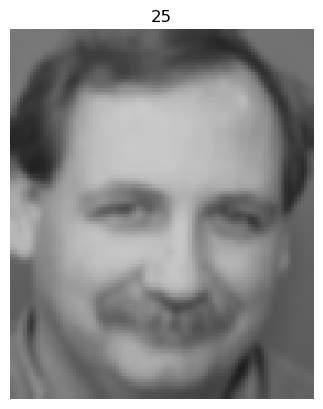

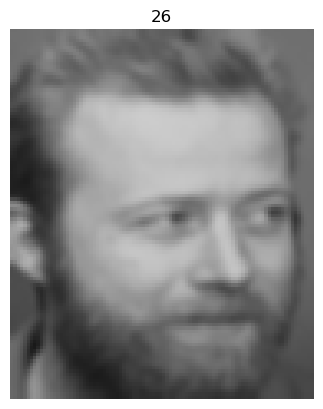

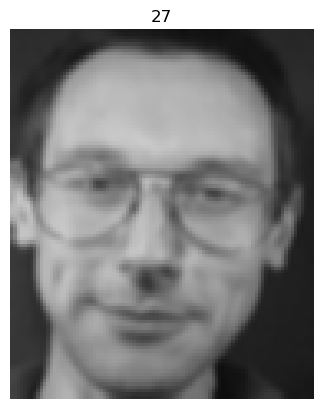

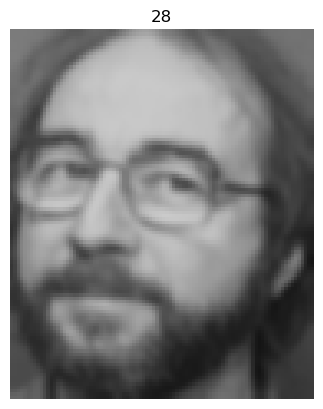

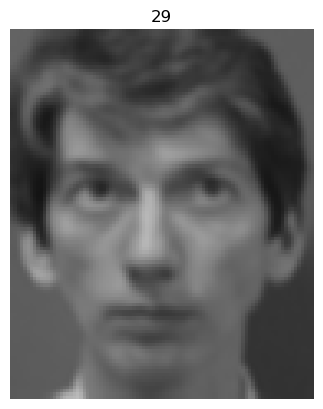

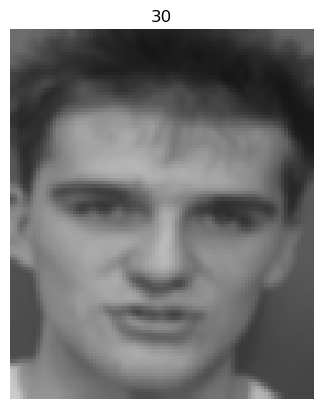

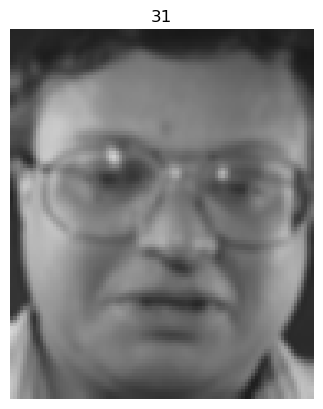

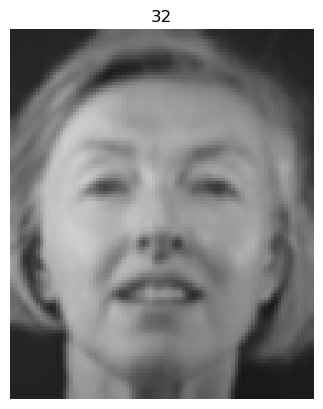

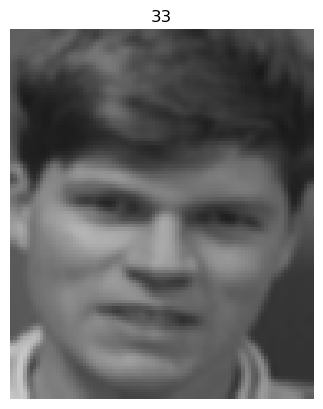

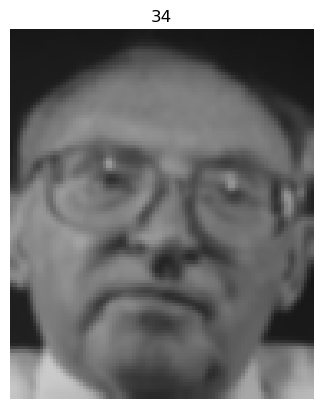

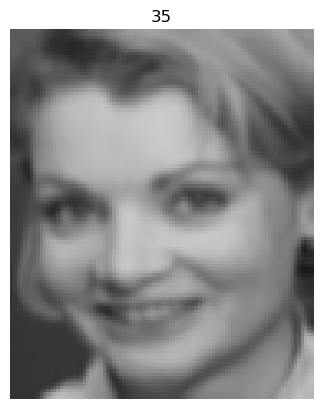

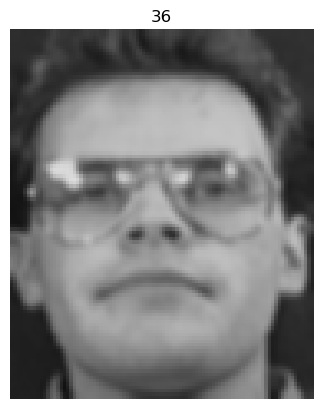

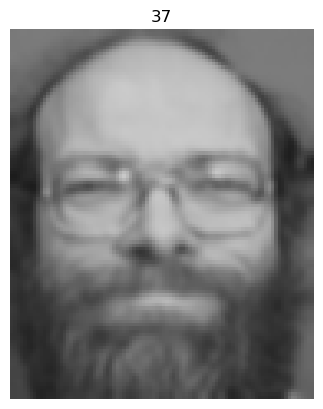

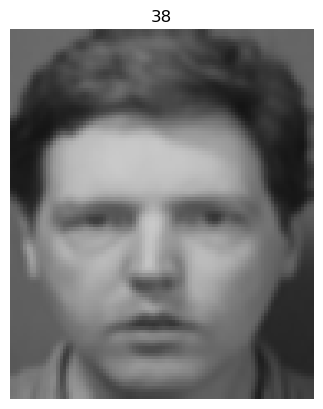

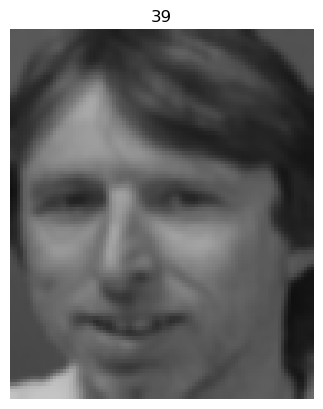

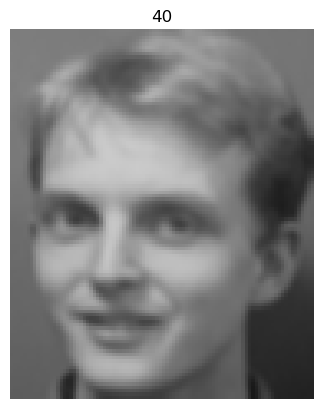

Images shape: (400, 10304)
Labels shape: (400, 1)


In [8]:
# pip install natsort 
from natsort import natsorted

all_images = []
all_labels = []

entries = os.listdir("dataset")
# Natsort is used to sort the images in the order of their names which the normal sort fails to do
entries = natsorted(entries)
for i,entry in enumerate(entries):
    images = os.listdir("dataset/"+entry)
    images = natsorted(images)
    for image in images:
        # Reading the image and converting it to grayscale
        img = cv2.imread("dataset/"+entry+"/"+image,cv2.IMREAD_GRAYSCALE)
        # Flastten / normalize the image
        all_images.append(img.flatten()/255)
        all_labels.append(i+1)
    # print(img)
    label = i+1
    show_image(img,label)

# Generating Data matrix
all_images = np.array(all_images)
all_labels = np.array(all_labels)
all_labels=all_labels.reshape(all_labels.shape[0],-1)

print(f"Images shape: {all_images.shape}")
print(f"Labels shape: {all_labels.shape}")

In [9]:
# Splitting the data into train and test (Odd images for training and even images for testing) <<-- This is a bad way to do it
Xtrain = all_images[1::2]
Ytrain = all_labels[1::2]
Xtest = all_images[0::2]
Ytest = all_labels[0::2]

print(f"Xtrain shape: {Xtrain.shape}")
print(f"Ytrain shape: {Ytrain.shape}")
print(f"Xtest shape: {Xtest.shape}")
print(f"Ytest shape: {Ytest.shape}")

Xtrain shape: (200, 10304)
Ytrain shape: (200, 1)
Xtest shape: (200, 10304)
Ytest shape: (200, 1)


In [10]:
Xtrain_transposed = Xtrain.transpose()
means = [np.mean(row) for row in Xtrain_transposed]
means = np.array(means)
print(f"Means shape: {means.shape}")

Means shape: (10304,)


In [11]:
Z = Xtrain - means
print(f"Z shape: {Z.shape}")
cov = 1/len(Xtrain) * np.matmul(Z.transpose(),Z)
print(f"Covariance shape: {cov.shape}")

Z shape: (200, 10304)
Covariance shape: (10304, 10304)


In [12]:
eig_values, eig_vectors = np.linalg.eigh(cov)
idx = eig_values.argsort()[::-1]  
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

In [13]:
eig_values_sorted = sorted(eig_values,reverse=True)

In [14]:
def get_dimensions(eigen_values, alpha):
    total = eig_values.sum()
    sum=0
    for i,val in enumerate(eigen_values):
        sum+=val
        if sum/total >= alpha:
            break
    return i+1

In [15]:
alphas = [0.8,0.85,0.9,0.95]
r = [get_dimensions(eig_values_sorted,alpha) for alpha in alphas]
r

[37, 53, 77, 116]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

for x in range(len(r)):
    
    p_train_data = np.matmul(eig_vectors[:, 0:r[x]].T, Xtrain.T).T
    p_test_data = np.matmul(eig_vectors[:, 0:r[x]].T, Xtest.T).T

    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(p_train_data, Ytrain)

    y_pred=neigh.predict(p_test_data)

    print(Ytest)
    print(Ytest.shape)
    print('accuracy for alpha = ',alphas[x])

    print(classification_report(Ytest, y_pred))
   

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [10]
 [10]
 [10]
 [10]
 [10]
 [11]
 [11]
 [11]
 [11]
 [11]
 [12]
 [12]
 [12]
 [12]
 [12]
 [13]
 [13]
 [13]
 [13]
 [13]
 [14]
 [14]
 [14]
 [14]
 [14]
 [15]
 [15]
 [15]
 [15]
 [15]
 [16]
 [16]
 [16]
 [16]
 [16]
 [17]
 [17]
 [17]
 [17]
 [17]
 [18]
 [18]
 [18]
 [18]
 [18]
 [19]
 [19]
 [19]
 [19]
 [19]
 [20]
 [20]
 [20]
 [20]
 [20]
 [21]
 [21]
 [21]
 [21]
 [21]
 [22]
 [22]
 [22]
 [22]
 [22]
 [23]
 [23]
 [23]
 [23]
 [23]
 [24]
 [24]
 [24]
 [24]
 [24]
 [25]
 [25]
 [25]
 [25]
 [25]
 [26]
 [26]
 [26]
 [26]
 [26]
 [27]
 [27]
 [27]
 [27]
 [27]
 [28]
 [28]
 [28]
 [28]
 [28]
 [29]
 [29]
 [29]
 [29]
 [29]
 [30]
 [30]
 [30]
 [30]
 [30]
 [31]
 [31]
 [31]
 [31]
 [31]
 [32]
 [32]
 [32]
 [32]
 [32]
 [33]
 [33]
 [33]
 [33]
 [33]
 [34]
 [34

In [17]:
test = []
for i in range(len(Xtest)): 
    test.append(Xtest[i].reshape(112,92)*255)
test = np.array(test)
test = test.astype(np.uint8)

In [18]:
def compare_images(ypred,ytest) :

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    
    # Plot the first image
    image = cv2.cvtColor(test[ypred], cv2.COLOR_BGR2RGB)
    image = cv2.convertScaleAbs(image)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0) #blurry the image
    axes[0].imshow(blurred_image)
    axes[0].set_title(ypred)
    axes[0].axis('off')


    # Plot the second image
    image = cv2.cvtColor(test[ytest[0]], cv2.COLOR_BGR2RGB)
    image = cv2.convertScaleAbs(image)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0) #blurry the image
    axes[1].imshow(blurred_image)
    axes[1].set_title(ytest[0])
    axes[1].axis('off')

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)

    # Display the figure
    plt.show()

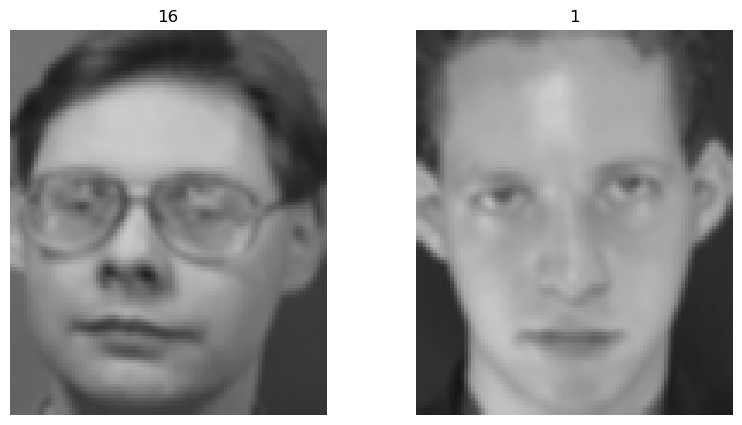

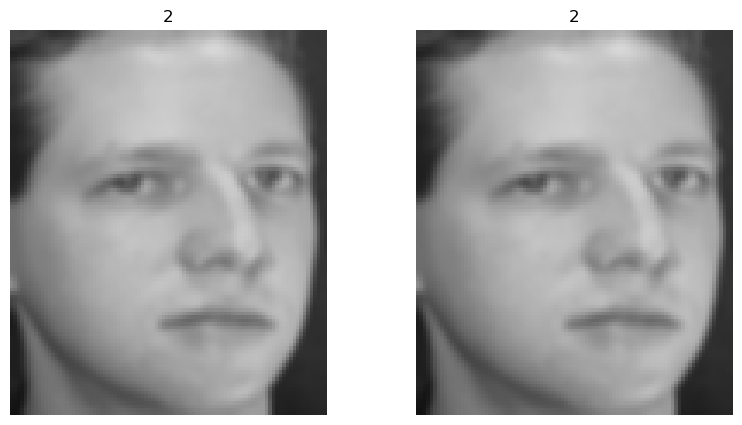

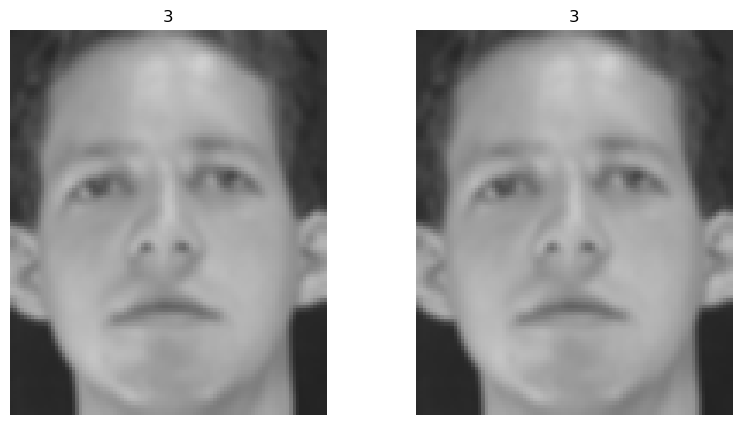

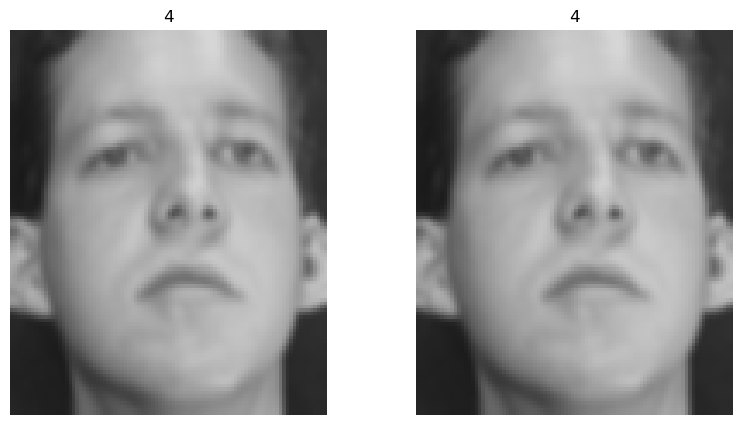

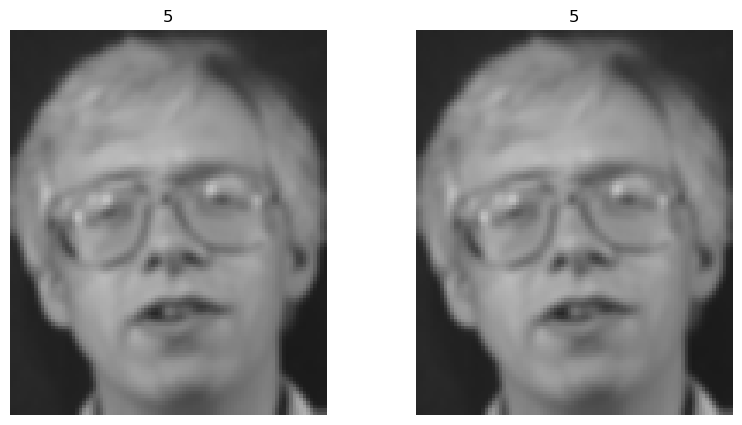

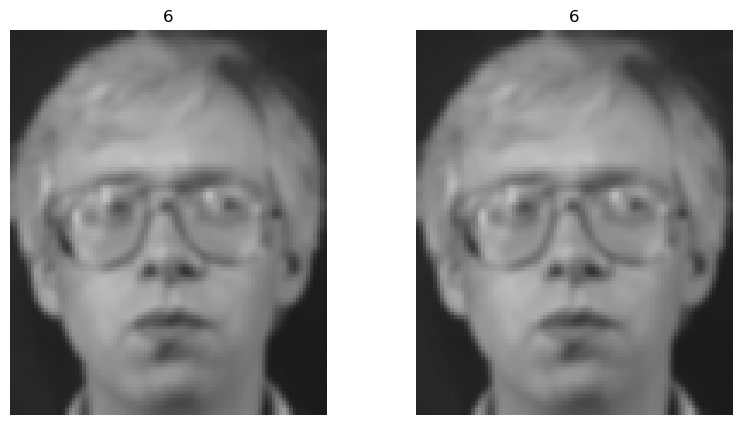

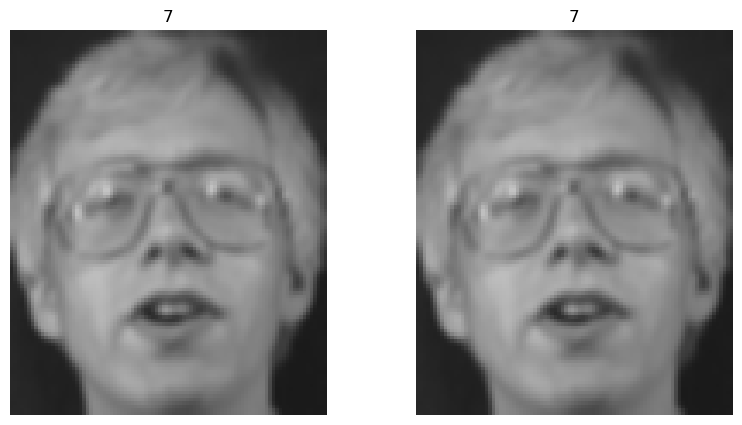

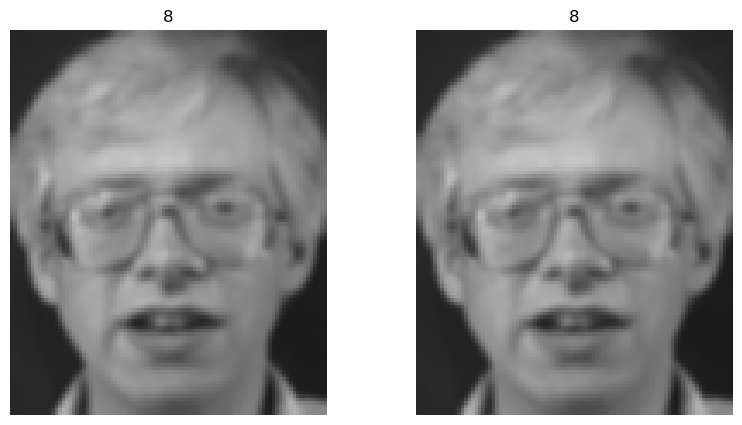

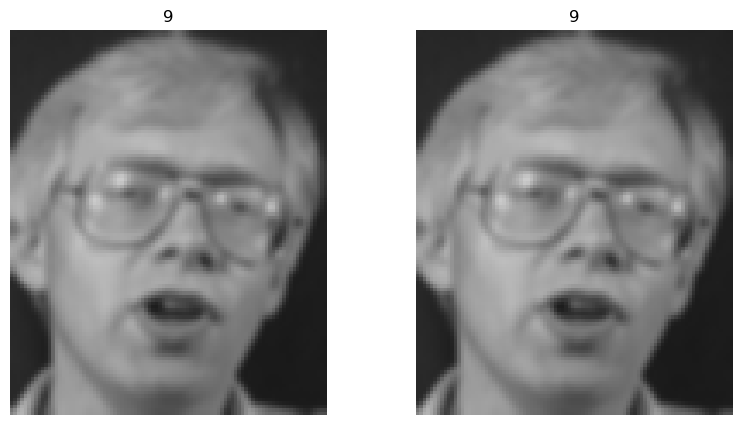

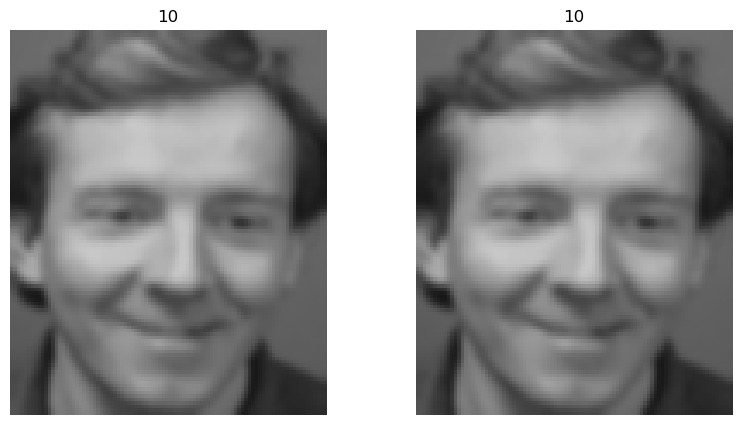

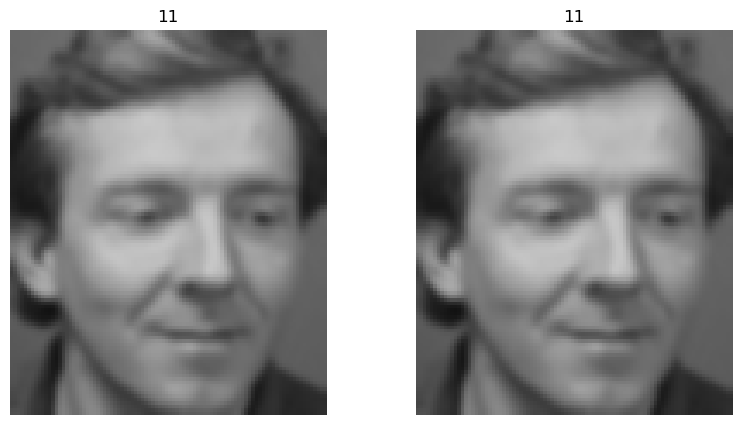

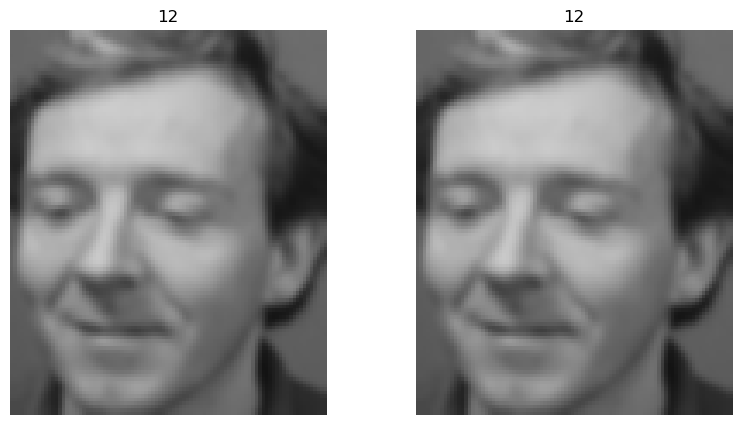

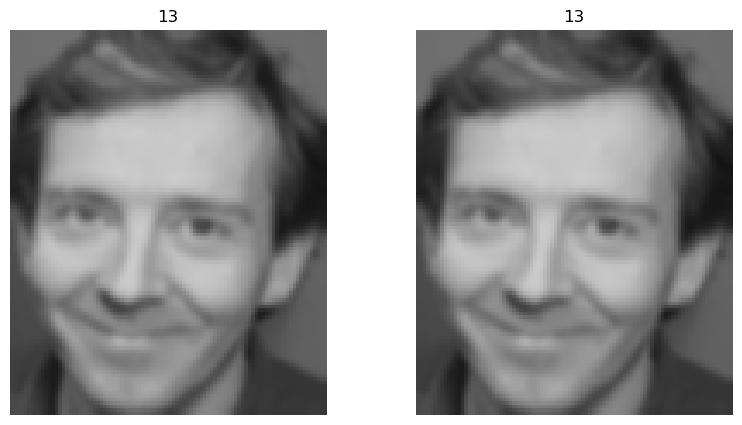

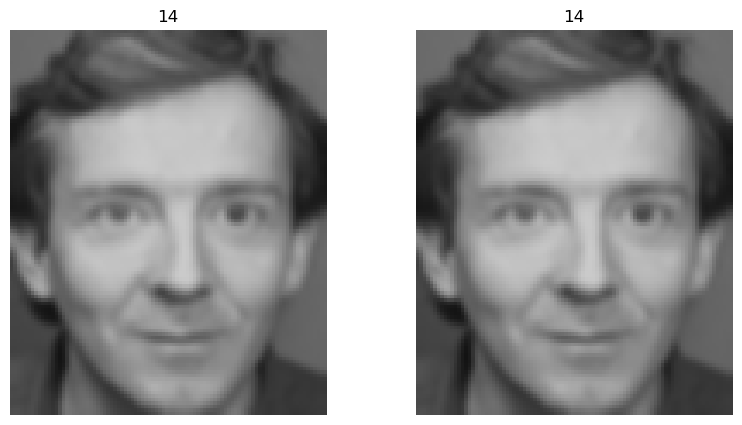

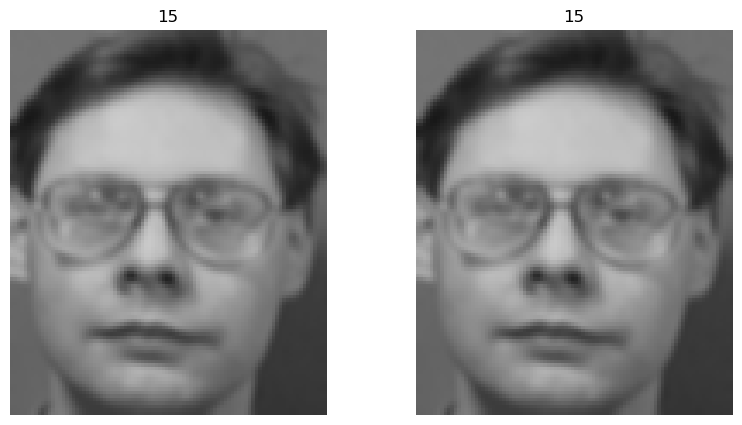

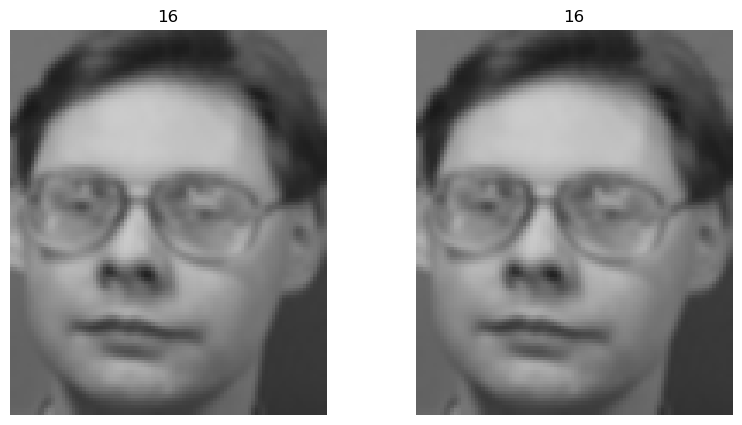

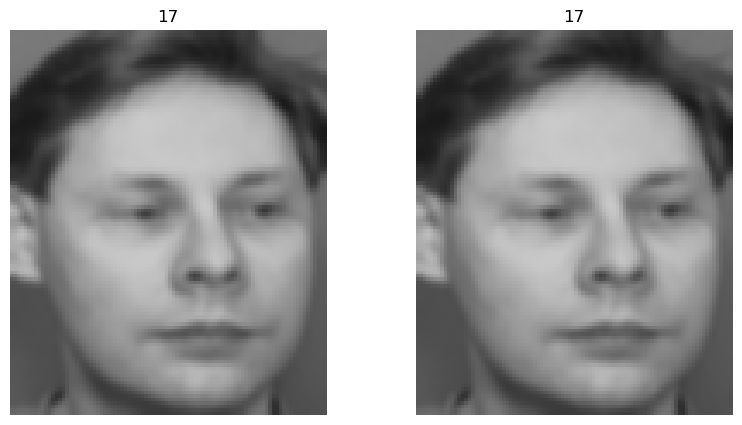

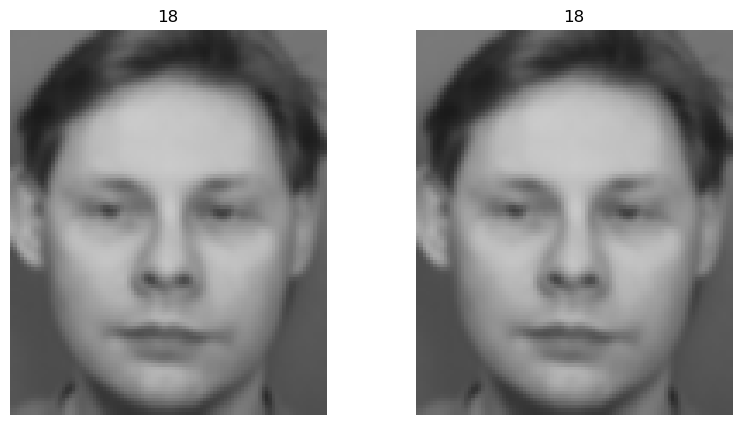

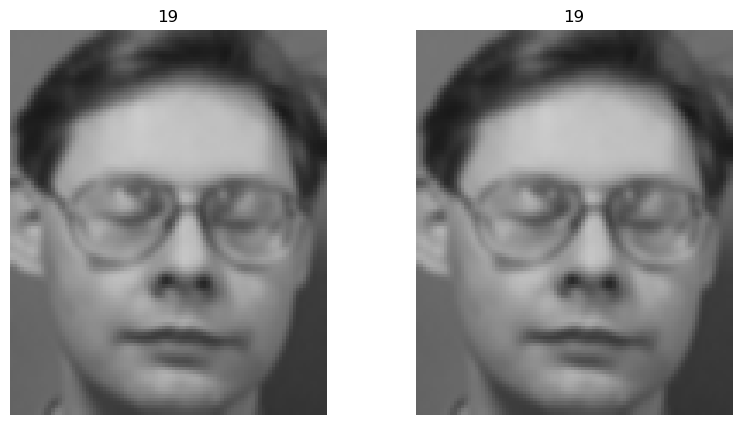

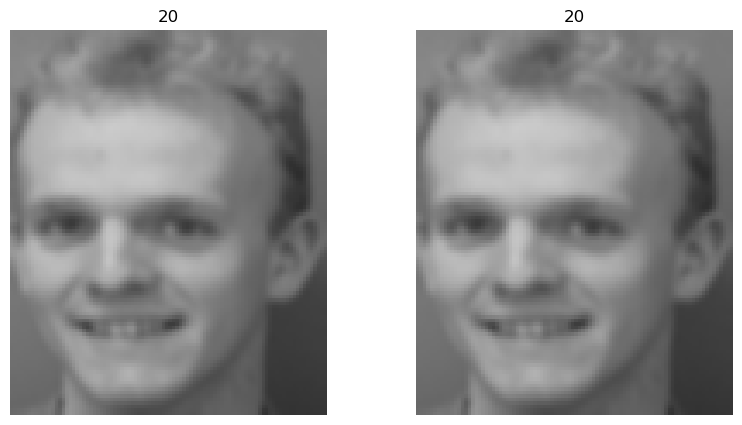

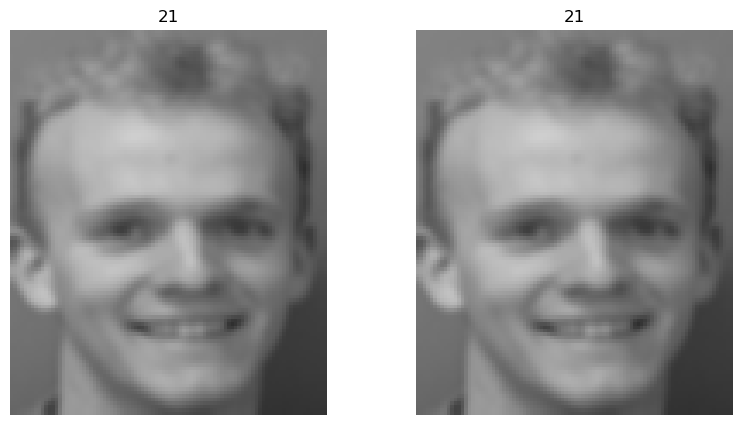

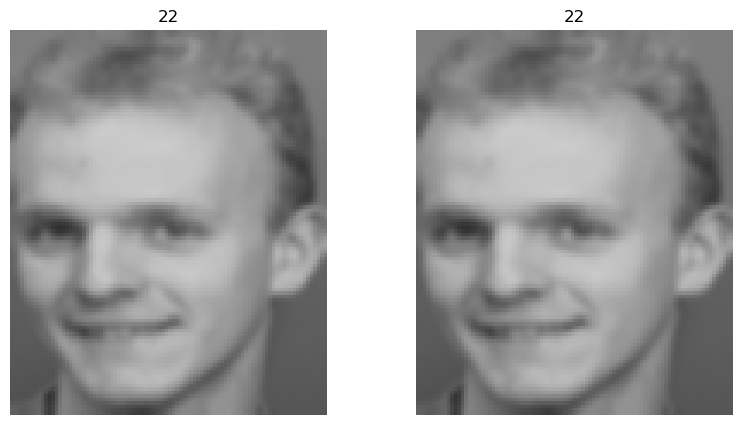

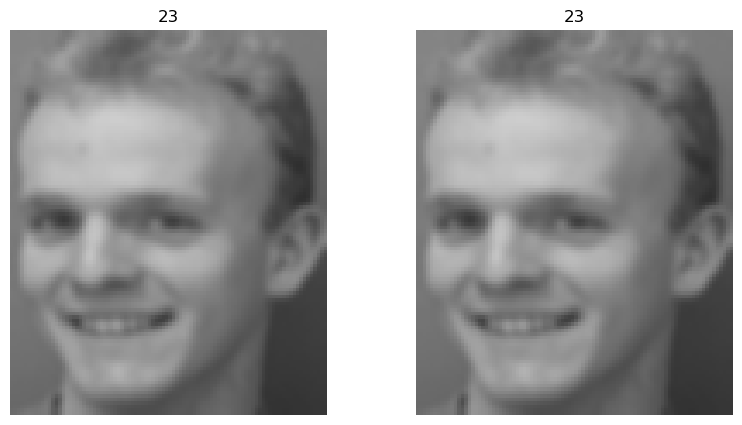

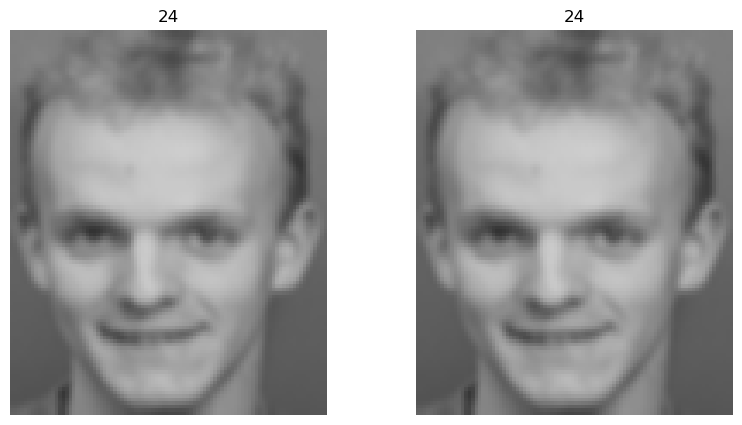

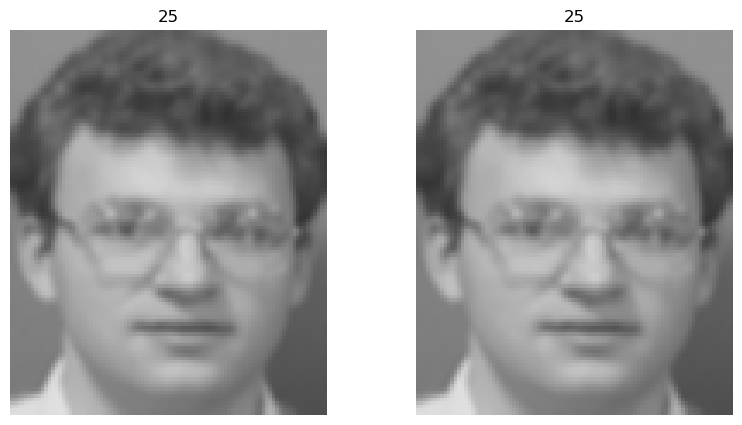

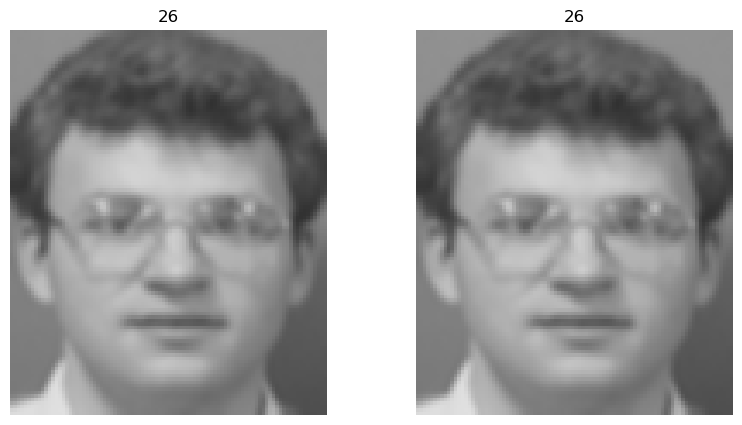

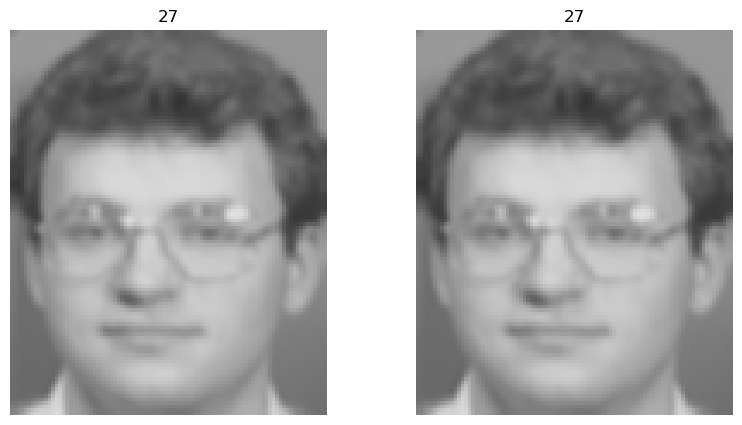

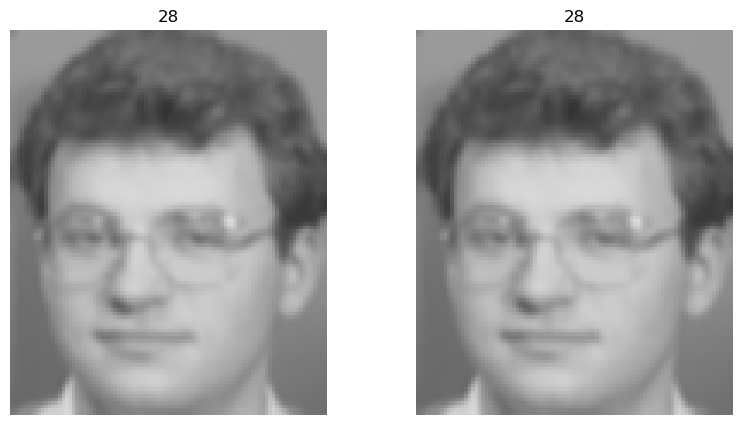

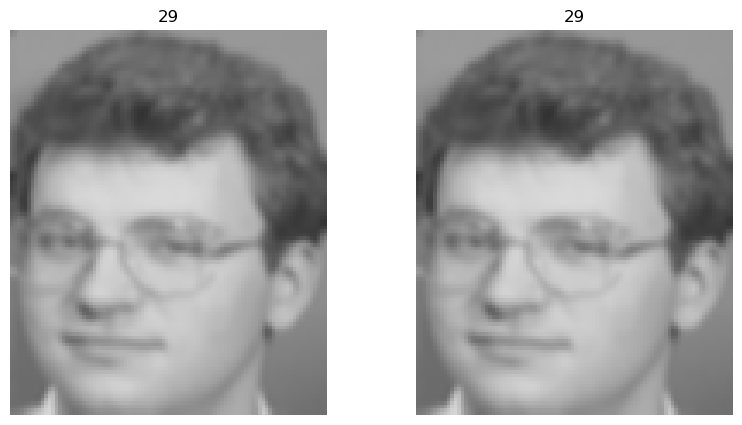

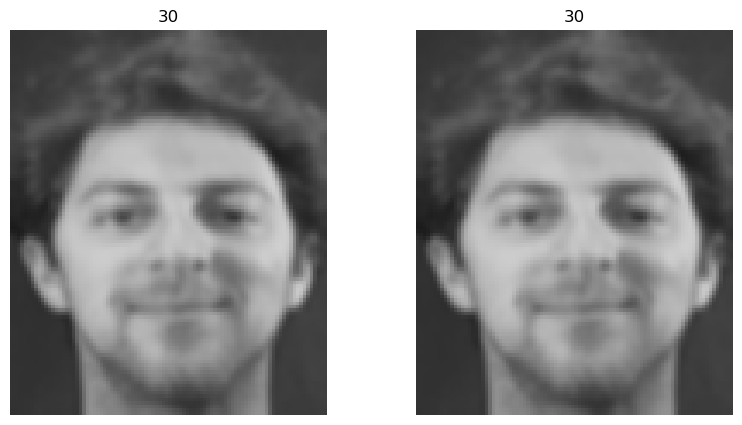

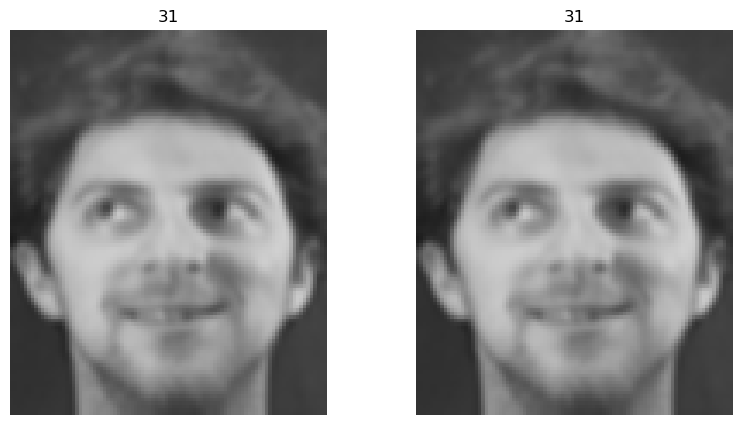

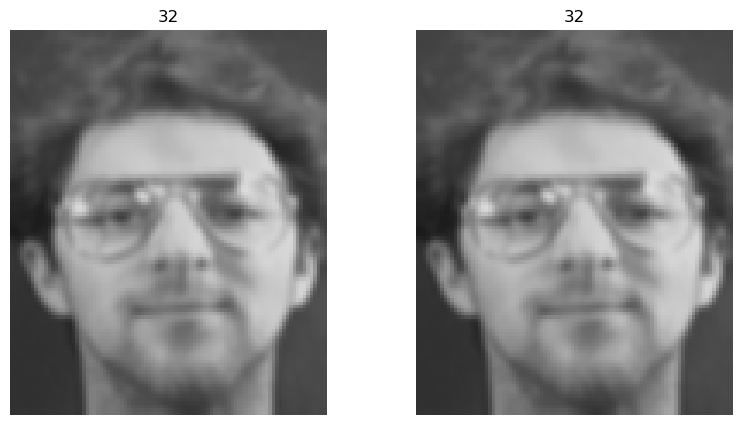

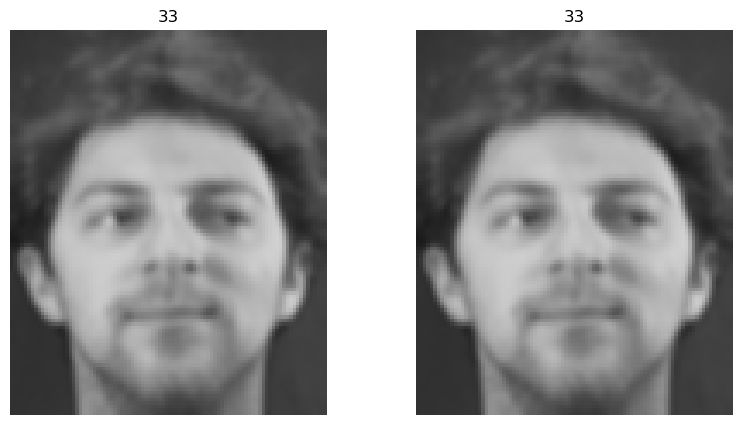

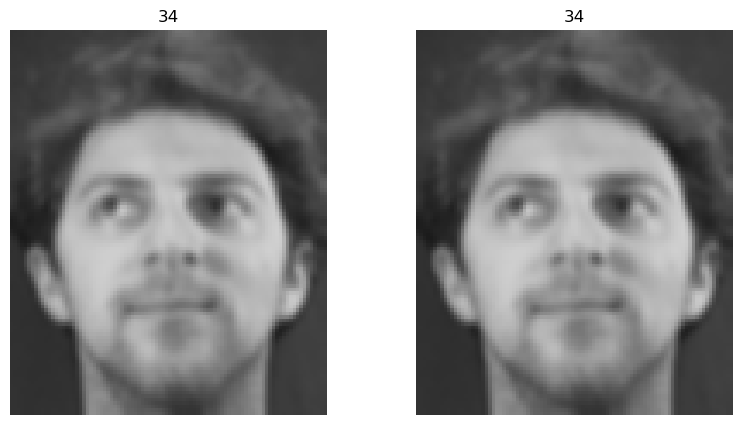

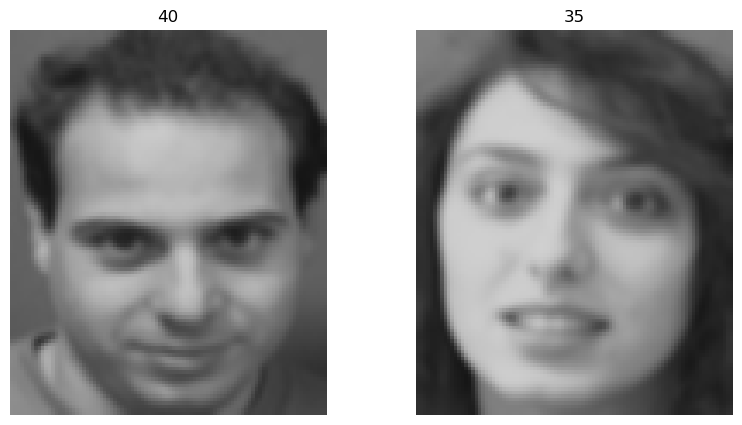

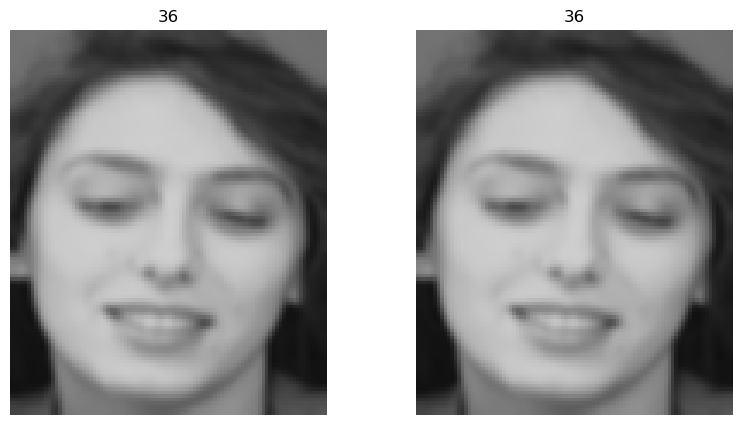

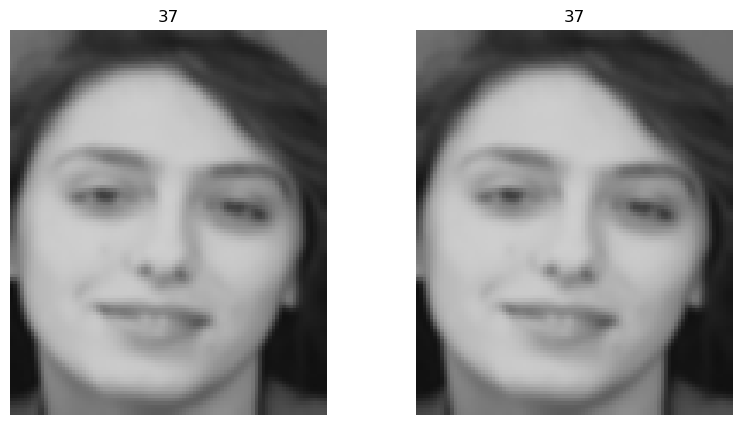

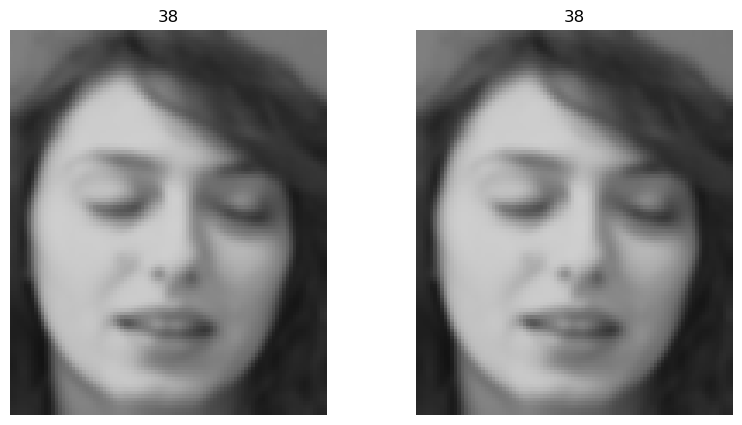

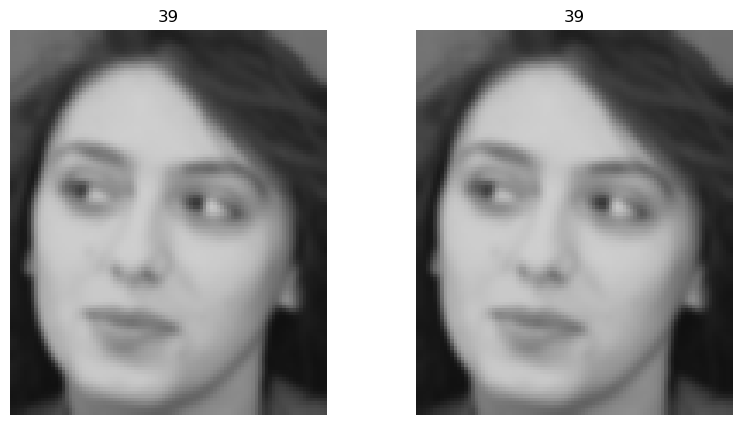

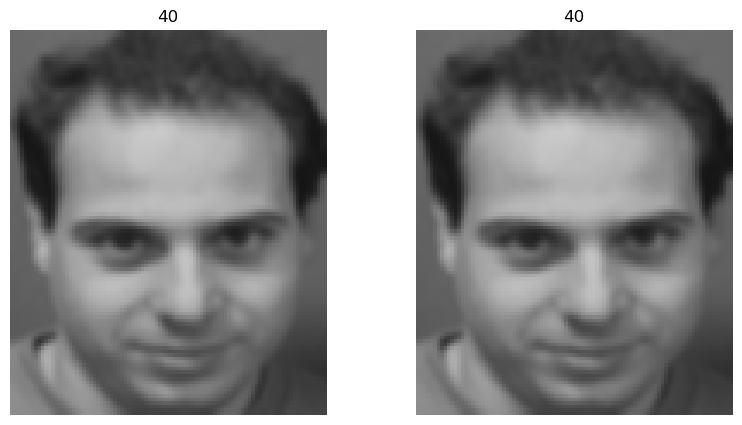

In [19]:
for i in range(len(Ytest)):
    if i%5==0:
        compare_images(y_pred[i],Ytest[i])